In [99]:
import warnings
import pickle

import numpy as np
import pandas as pd

from tqdm import tqdm
from glob import glob

from scipy import stats

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [4]:
warnings.simplefilter('ignore')
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [81]:
embeds, rows = [], []

for path in tqdm(glob('../data/b7-embeds/*.p')):
    with open(path, 'rb') as fh:
        
        try:
            lines = pickle.load(fh)

            for line in lines:
                title = ' '.join(line.pop('tokens'))
                embeds.append(line.pop('embedding'))
                rows.append(dict(**line, title=title))
        
        except:
            pass

100%|██████████| 50/50 [00:09<00:00,  5.71it/s]


In [84]:
embeds = np.stack(embeds)

In [85]:
df = pd.DataFrame(rows)

In [86]:
df.label.unique()

array(['apnews.com', 'cnn.com', 'huffingtonpost.com', 'reuters.com',
       'breitbart.com', 'nytimes.com', 'foxnews.com'], dtype=object)

In [87]:
embeds.shape

(500000, 512)

In [88]:
df.iloc[16].preds

{'reuters.com': 0.005244717,
 'apnews.com': 0.0019176226,
 'cnn.com': 0.38251486,
 'foxnews.com': 0.0749464,
 'nytimes.com': 0.008876507,
 'breitbart.com': 0.11379952,
 'huffingtonpost.com': 0.4127005}

In [97]:
def plot_weight_count(d):
    
    ddf = df[df.label==d]
    weight = ddf.preds.apply(lambda p: p[d])

    plt.figure(figsize=(10,5))
    plt.yscale('log')
    plt.scatter(weight, ddf['count'], s=1)
    plt.show()

apnews.com


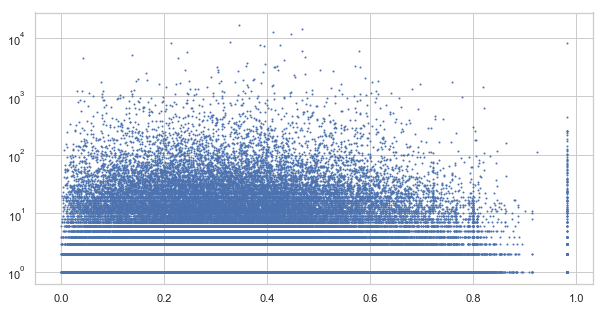

cnn.com


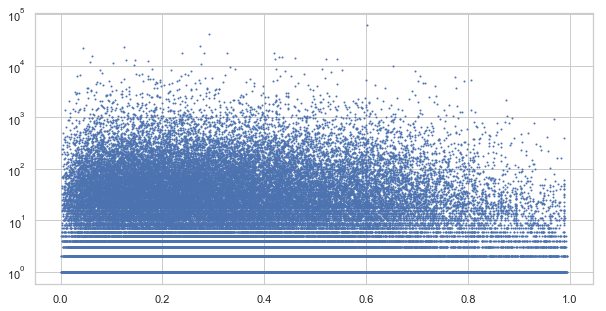

huffingtonpost.com


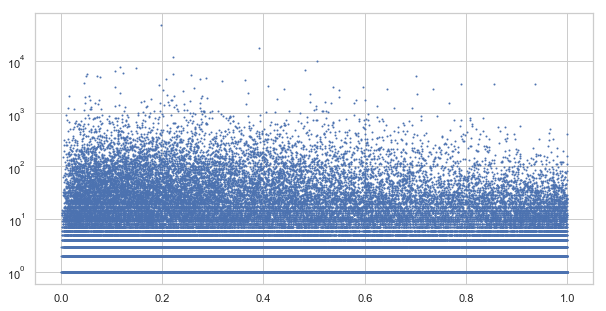

reuters.com


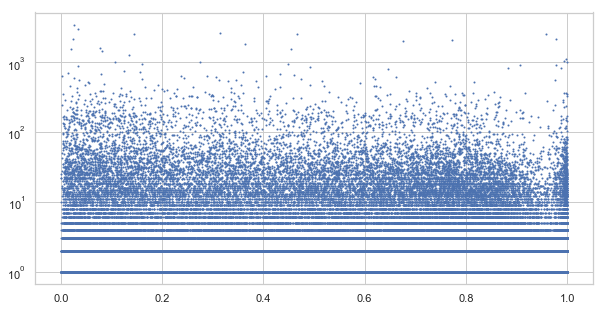

breitbart.com


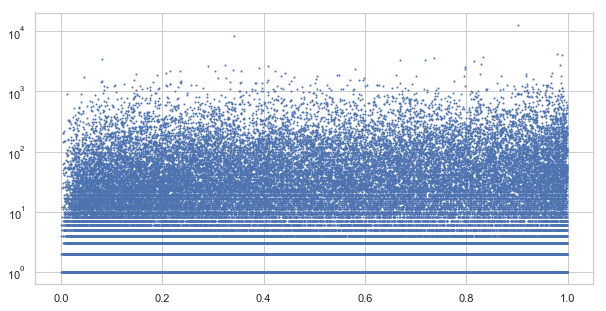

nytimes.com


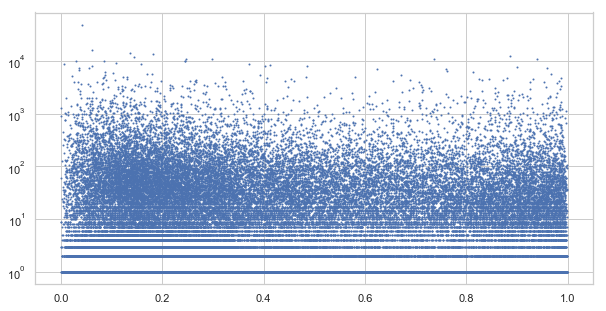

foxnews.com


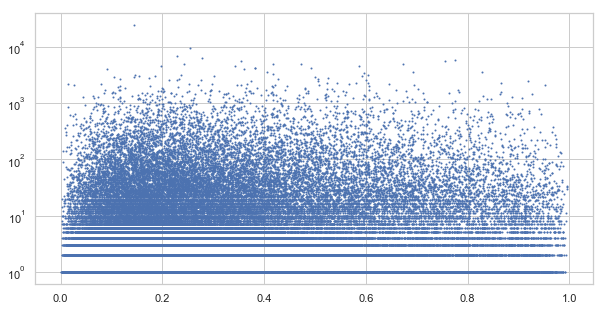

In [98]:
for d in df.label.unique():
    print(d)
    plot_weight_count(d)

apnews.com
(-0.19316345931900378, 0.0)
SpearmanrResult(correlation=-0.21944898122675474, pvalue=0.0)
KendalltauResult(correlation=-0.15381178155635652, pvalue=0.0)


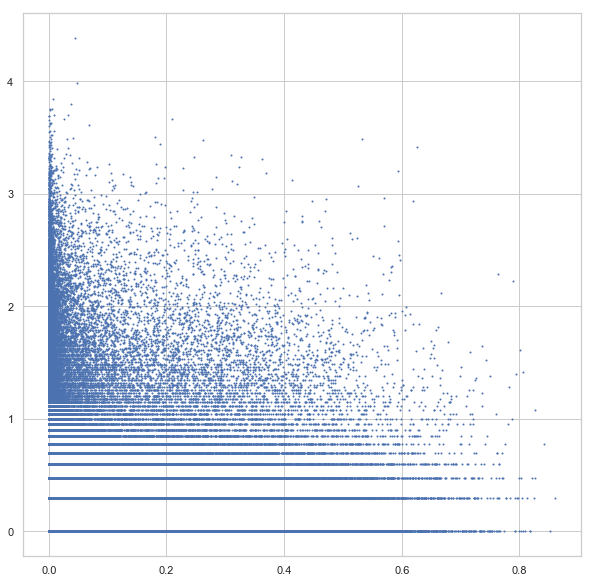

cnn.com
(-0.03245167982618871, 4.236307494388024e-18)
SpearmanrResult(correlation=-0.021920998257892718, pvalue=4.706167544595839e-09)
KendalltauResult(correlation=-0.01532879959858233, pvalue=5.244848777153417e-09)


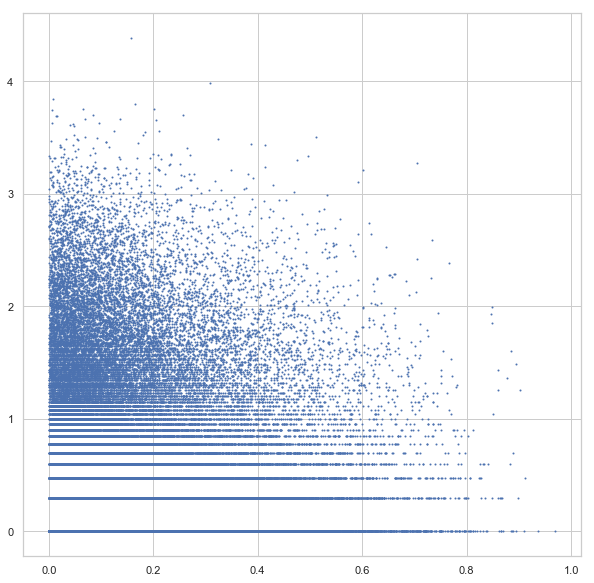

huffingtonpost.com
(0.02992629147918779, 1.2741588437810829e-15)
SpearmanrResult(correlation=0.1010330563015242, pvalue=2.7719771734176017e-161)
KendalltauResult(correlation=0.0700360892697753, pvalue=8.272978225119752e-157)


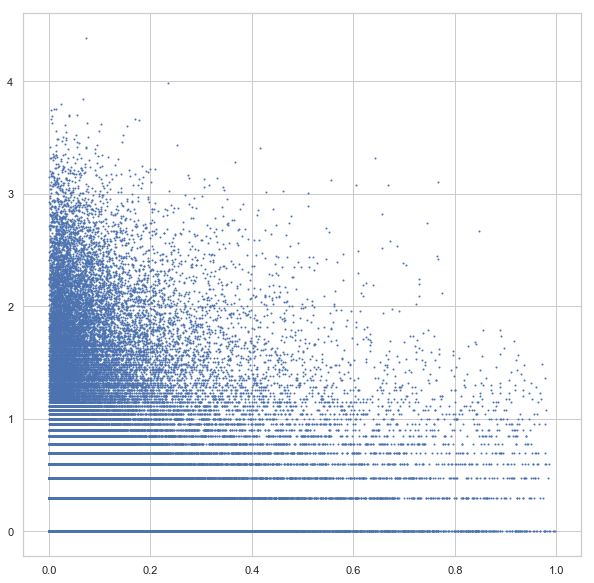

reuters.com
(-0.08008598924597712, 6.9199776322638355e-102)
SpearmanrResult(correlation=-0.09716747057829486, pvalue=2.8356504131296217e-149)
KendalltauResult(correlation=-0.06793302334802759, pvalue=1.1846142189655939e-147)


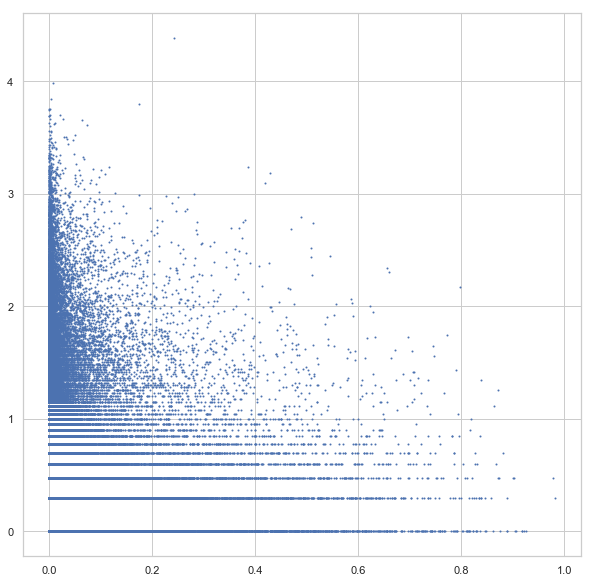

breitbart.com
(0.19507955958800227, 0.0)
SpearmanrResult(correlation=0.15414479411776347, pvalue=0.0)
KendalltauResult(correlation=0.10811754757840494, pvalue=0.0)


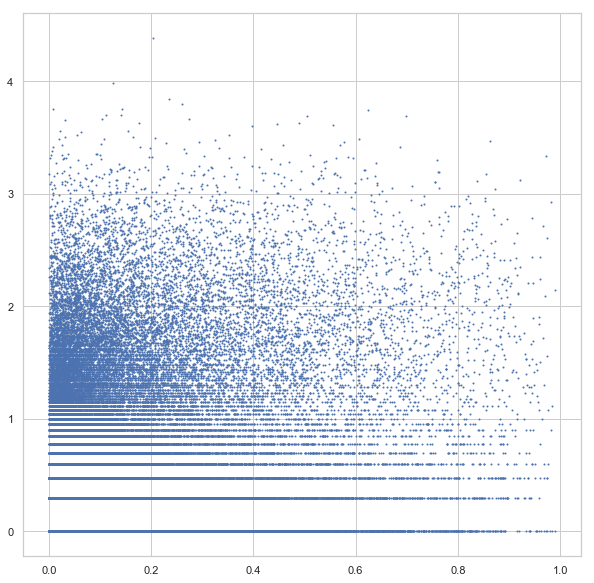

nytimes.com
(-0.12949094806498085, 1.8373609553880467e-264)
SpearmanrResult(correlation=-0.15094323103516502, pvalue=0.0)
KendalltauResult(correlation=-0.10591223820326261, pvalue=0.0)


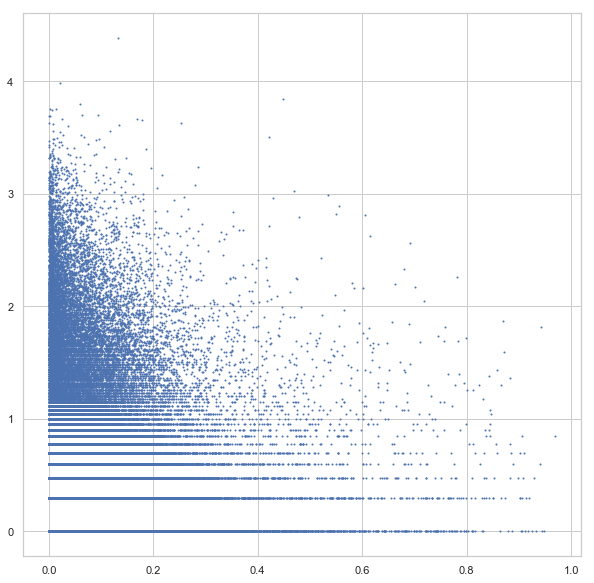

foxnews.com
(0.08804965297449148, 7.898409893469214e-123)
SpearmanrResult(correlation=0.08771456325408344, pvalue=6.594284764177156e-122)
KendalltauResult(correlation=0.061415215020908416, pvalue=4.814806401820424e-121)


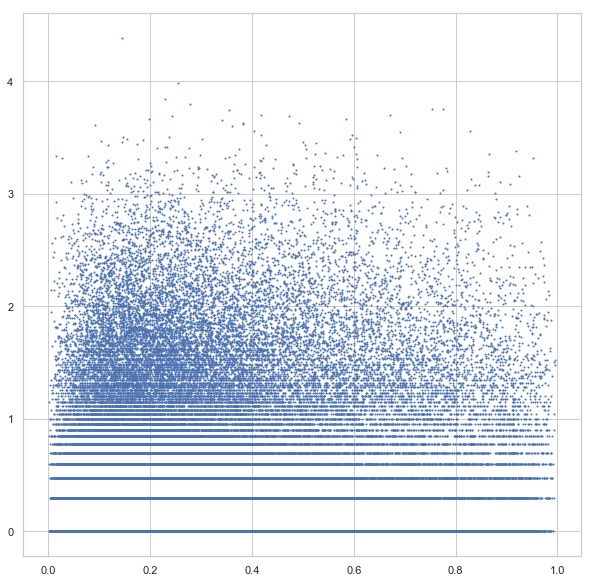

In [122]:
ddf = df[df.label=='foxnews.com']
counts = np.log10(ddf['count'])

for d in df.label.unique():
    weight = ddf.preds.apply(lambda p: p[d])
    print(d)
    print(stats.pearsonr(weight, counts))
    print(stats.spearmanr(weight, counts))
    print(stats.kendalltau(weight, counts))
    plt.figure(figsize=(10,10))
    plt.scatter(weight, counts, s=1)
    plt.show()

apnews.com
(-0.28606399982197045, 0.0)
SpearmanrResult(correlation=-0.27721237723102177, pvalue=0.0)
KendalltauResult(correlation=-0.19753763982700984, pvalue=0.0)


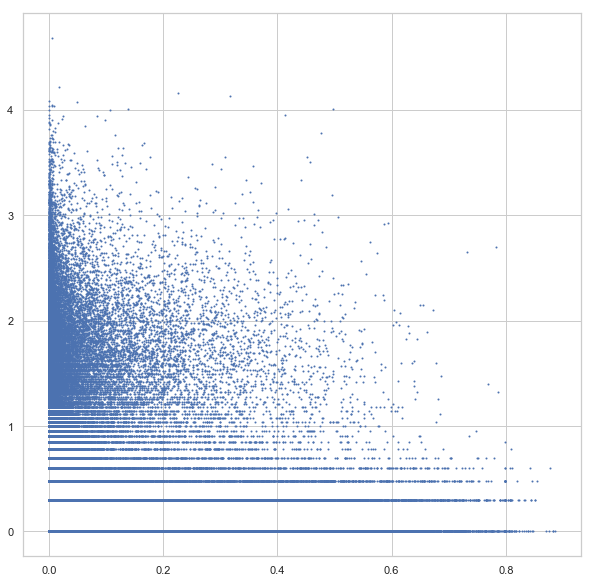

cnn.com
(0.07307595473933552, 2.7836538934057147e-85)
SpearmanrResult(correlation=0.05167051175729904, pvalue=1.719857400175679e-43)
KendalltauResult(correlation=0.03667467905353966, pvalue=1.7358791643206222e-43)


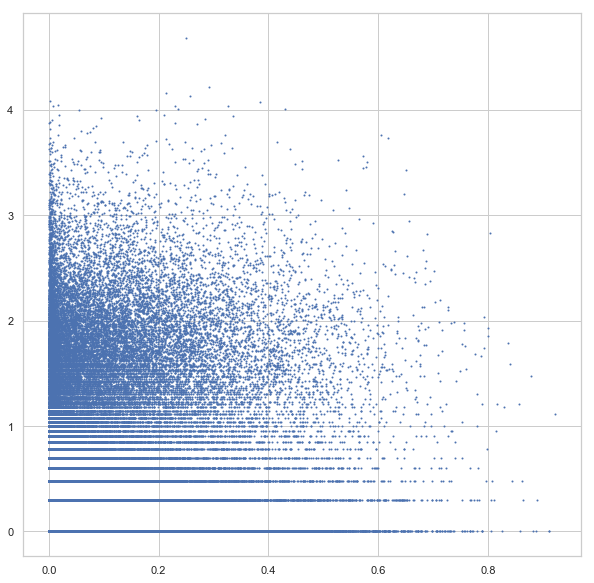

huffingtonpost.com
(0.20867402564694365, 0.0)
SpearmanrResult(correlation=0.3100895891486223, pvalue=0.0)
KendalltauResult(correlation=0.21953002157424464, pvalue=0.0)


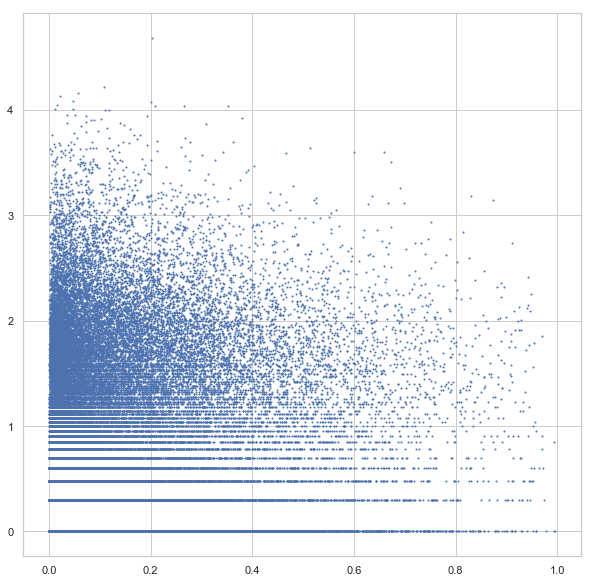

reuters.com
(-0.2205360808506717, 0.0)
SpearmanrResult(correlation=-0.22967205157394863, pvalue=0.0)
KendalltauResult(correlation=-0.16263392730485687, pvalue=0.0)


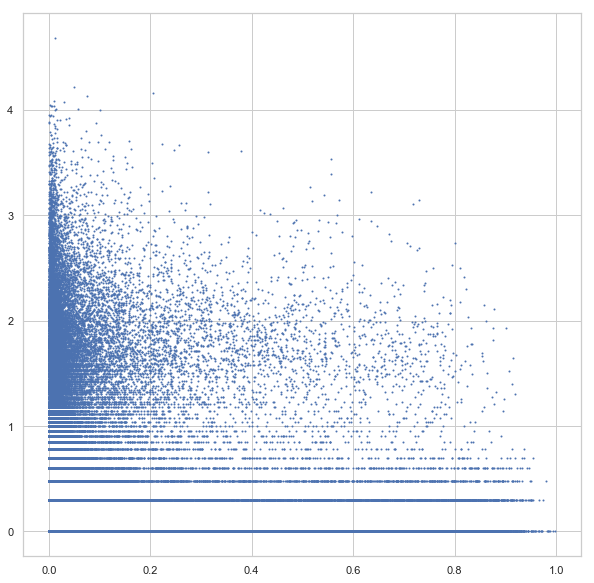

breitbart.com
(0.04227914447444427, 1.1385600586462804e-29)
SpearmanrResult(correlation=-0.031191421917821007, pvalue=7.178309259023201e-17)
KendalltauResult(correlation=-0.022840703514980673, pvalue=7.195253850412448e-18)


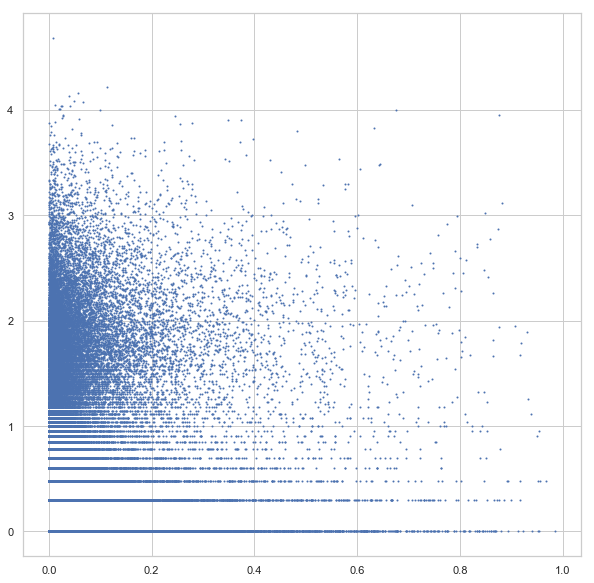

nytimes.com
(0.20753415198929945, 0.0)
SpearmanrResult(correlation=0.23305503414745696, pvalue=0.0)
KendalltauResult(correlation=0.16481200168360063, pvalue=0.0)


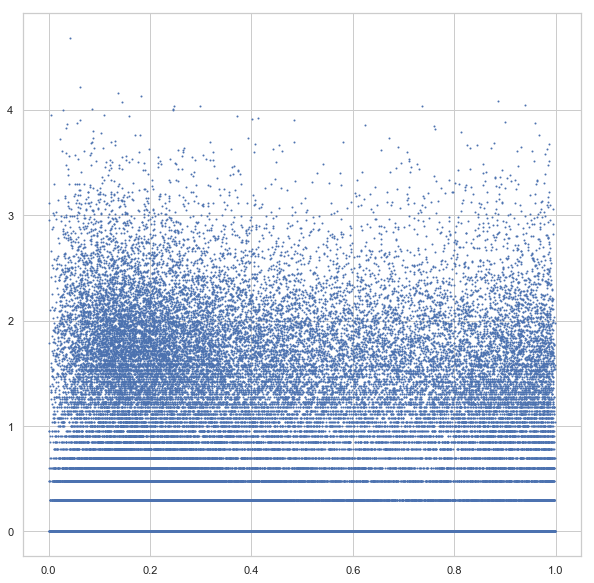

foxnews.com
(-0.08520399705199853, 2.362394981525352e-115)
SpearmanrResult(correlation=-0.10947811166641642, pvalue=1.4153592643649976e-189)
KendalltauResult(correlation=-0.0774674770942703, pvalue=1.5358800189851572e-187)


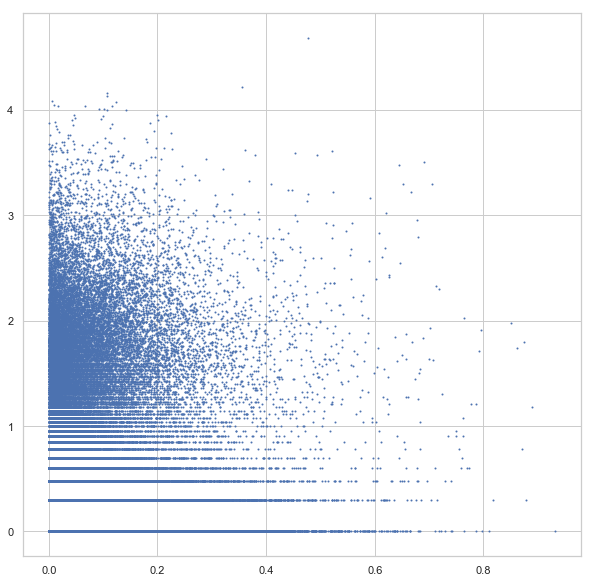

In [125]:
ddf = df[df.label=='nytimes.com']
counts = np.log10(ddf['count'])

for d in df.label.unique():
    weight = ddf.preds.apply(lambda p: p[d])
    print(d)
    print(stats.pearsonr(weight, counts))
    print(stats.spearmanr(weight, counts))
    print(stats.kendalltau(weight, counts))
    plt.figure(figsize=(10,10))
    plt.scatter(weight, counts, s=1)
    plt.show()